In [45]:
pip install pathway bokeh --quiet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = 2.5
base_price = 10.0

In [46]:
df = pd.read_csv("/content/dataset.csv")
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [6]:
df['price'] = base_price

In [7]:
new_prices = []

In [8]:
for lot_id, group in df.groupby('ID'):
    price = base_price
    prices = []
    for _, row in group.iterrows():
        occ = row['Occupancy']
        cap = row['Capacity']
        utilization = occ / cap if cap > 0 else 0
        price = price + alpha * utilization
        price = max(5, min(30, price))
        prices.append(price)
    new_prices.extend(prices)

In [9]:
df['Model1_Price'] = new_prices

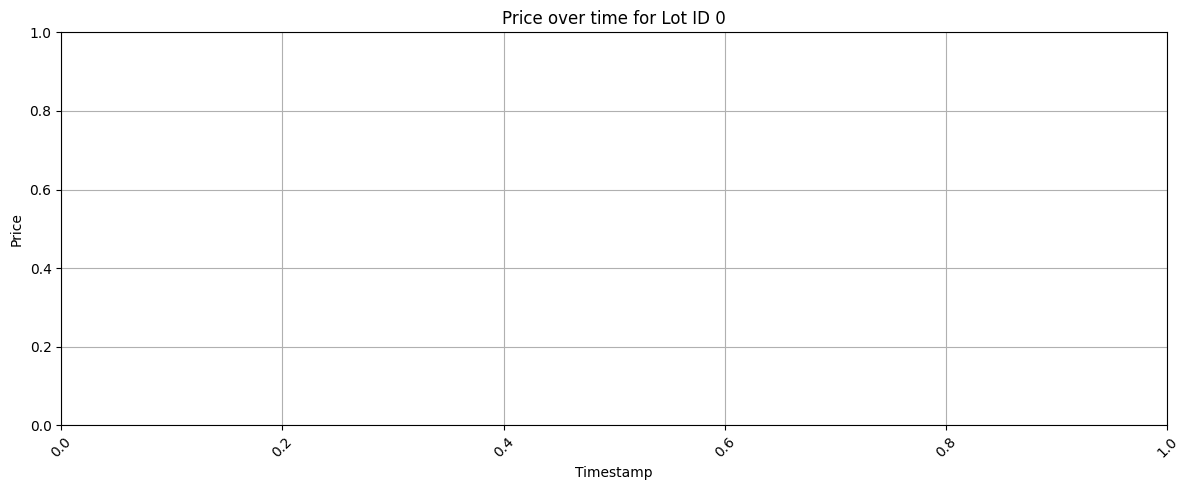

In [11]:
import seaborn as sns
plt.figure(figsize=(12, 5))
sample_lot = df[df['ID'] == df['ID'].unique()[0]]
plt.title(f"Price over time for Lot ID {sample_lot['ID'].iloc[0]}")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cols_to_convert = ['Occupancy', 'Capacity', 'QueueLength', 'TrafficConditionNearby', 'IsSpecialDay']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
vehicle_type_map = {'car': 1.0, 'bike': 0.7, 'truck': 1.3}
df['VehicleTypeWeight'] = df['VehicleType'].map(vehicle_type_map).fillna(1.0)

In [17]:
vehicle_weights = {'car': 1.0, 'bike': 0.7, 'truck': 1.5}
df['VehicleTypeWeight'] = df['VehicleType'].map(vehicle_weights)

In [18]:
df['VehicleTypeWeight'] = df['VehicleTypeWeight'].fillna(1.0)

In [19]:
df['OccupancyRate'] = df['Occupancy'] / df['Capacity']
df['TrafficNormalized'] = df['TrafficConditionNearby'] / df['TrafficConditionNearby'].max()
df['QueueNormalized'] = df['QueueLength'] / df['QueueLength'].max()

In [20]:
alpha = 1.5
beta = 0.8
gamma = 0.5
delta = 0.9
epsilon = 1.2
lambda_factor = 0.6
base_price = 10

In [21]:
df['RawDemand'] = (
    alpha * df['OccupancyRate'] +
    beta * df['QueueNormalized'] -
    gamma * df['TrafficNormalized'] +
    delta * df['IsSpecialDay'] +
    epsilon * df['VehicleTypeWeight']
)

In [22]:
df['NormalizedDemand'] = (df['RawDemand'] - df['RawDemand'].min()) / (df['RawDemand'].max() - df['RawDemand'].min())



In [23]:
df['Model2_Price'] = base_price * (1 + lambda_factor * df['NormalizedDemand'])
df['Model2_Price'] = df['Model2_Price'].clip(lower=5, upper=20)

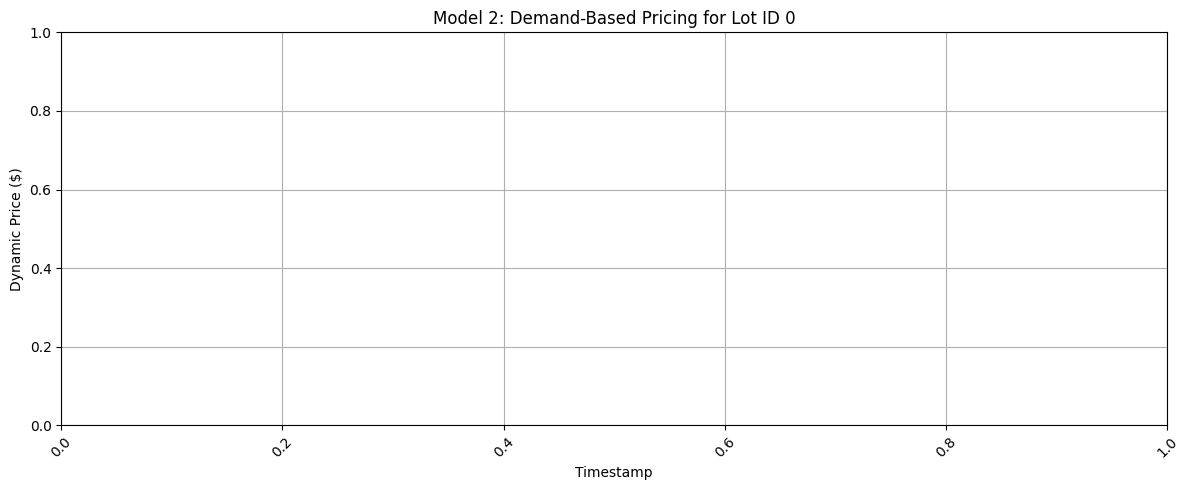

In [25]:
import seaborn as sns
plt.figure(figsize=(12, 5))
sample_lot = df[df['ID'] == df['ID'].unique()[0]]
plt.title(f"Model 2: Demand-Based Pricing for Lot ID {sample_lot['ID'].iloc[0]}")
plt.xlabel("Timestamp")
plt.ylabel("Dynamic Price ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
import numpy as np

In [27]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    return R * 2 * np.arcsin(np.sqrt(a))

In [28]:
parking_lots = df['ID'].unique()
base_price = 10
lambda_val = 0.25

/tmp/ipython-input-41-4066487781.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


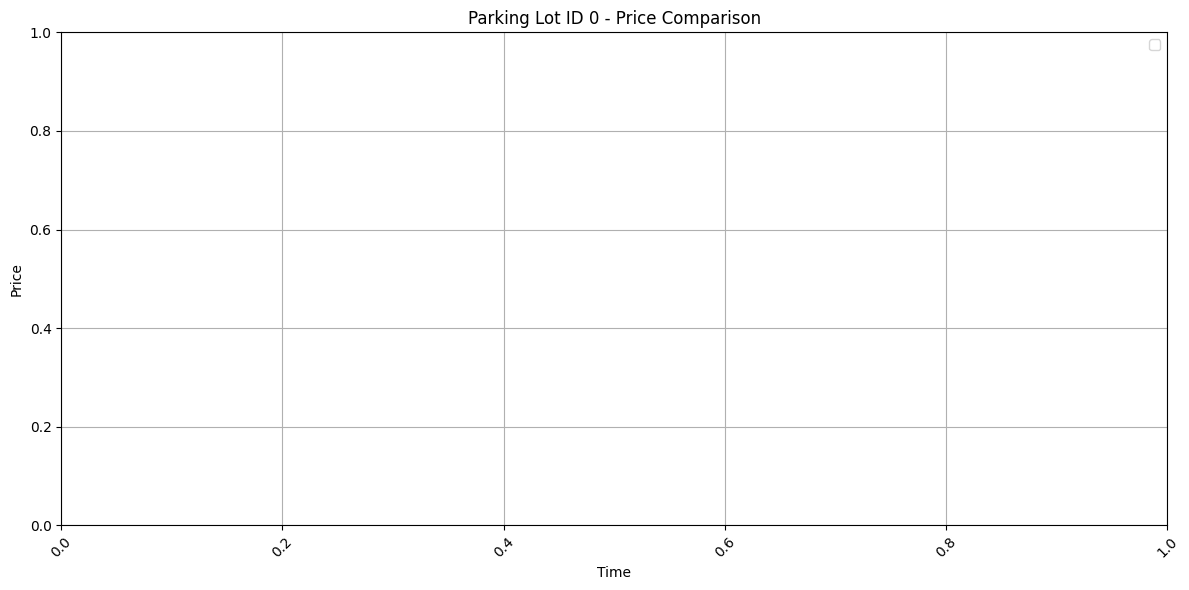

In [41]:
import matplotlib.pyplot as plt
lot_id = df['ID'].unique()[0]  # or any specific parking lot ID
lot_data = df[df['ID'] == lot_id]
plt.figure(figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'Parking Lot ID {lot_id} - Price Comparison')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
df.columns

Index(['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude',
       'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength',
       'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime',
       'VehicleTypeWeight', 'OccupancyRate', 'TrafficNormalized',
       'QueueNormalized', 'RawDemand', 'NormalizedDemand', 'Model2_Price',
       'comp_price'],
      dtype='object')